## Import of Dataframe and necessary modules

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import math
import warnings
from sql_functions import get_dataframe
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 60)
warnings.filterwarnings('ignore')


## Import dataframe

In [123]:
from master_df import setup

df_master = setup()

df_master.fillna(0, inplace=True)

## Quality of stock for a certain article to be assessed as "good" or "bad"


In [124]:
""" quality_stock_good_all = df_master.query('gesamt_lager > 0 and gesamt_vk >= 3').reset_index()
quality_stock_bad_all = df_master.query('gesamt_lager > 0  and gesamt_vk < 3').reset_index()

quality_stock_good_weiden = df_master.query('wen_lager > 0 and wen_vk >= 3').reset_index()
quality_stock_bad_weiden = df_master.query('wen_lager > 0 and wen_vk < 3').reset_index()

quality_stock_good_regensburg = df_master.query('rgb_lager > 0 and rgb_vk >= 3').reset_index()
quality_stock_bad_regensburg = df_master.query('rgb_lager > 0 and rgb_vk < 3').reset_index()

quality_stock_good_amberg = df_master.query('amb_lager > 0 and amb_vk >= 3').reset_index()
quality_stock_bad_amberg = df_master.query('amb_lager > 0 and amb_vk < 3').reset_index()

quality_stock_good_cham = df_master.query('cha_lager > 0 and cha_vk >= 3').reset_index()
quality_stock_bad_cham = df_master.query('cha_lager > 0 and cha_vk < 3').reset_index()

quality_stock_good_straubing = df_master.query('str_lager > 0 and str_vk >= 3').reset_index()
quality_stock_bad_straubing = df_master.query('str_lager > 0 and str_vk < 3').reset_index()

quality_stock_good_passau = df_master.query('pas_lager > 0 and pas_vk >= 3').reset_index()
quality_stock_bad_passau = df_master.query('pas_lager > 0 and pas_vk < 3').reset_index()

quality_stock_good_landshut = df_master.query('lan_lager > 0 and lan_vk >= 3').reset_index()
quality_stock_bad_landshut = df_master.query('lan_lager > 0 and lan_vk < 3').reset_index()

quality_stock_good_mühldorf = df_master.query('müh_lager > 0 and müh_vk >= 3').reset_index()
quality_stock_bad_mühldorf = df_master.query('müh_lager > 0 and müh_vk < 3').reset_index()

quality_stock_good_rosenheim = df_master.query('ros_lager > 0 and ros_vk >= 3').reset_index()
quality_stock_bad_rosenheim = df_master.query('ros_lager > 0 and ros_vk < 3').reset_index() """

" quality_stock_good_all = df_master.query('gesamt_lager > 0 and gesamt_vk >= 3').reset_index()\nquality_stock_bad_all = df_master.query('gesamt_lager > 0  and gesamt_vk < 3').reset_index()\n\nquality_stock_good_weiden = df_master.query('wen_lager > 0 and wen_vk >= 3').reset_index()\nquality_stock_bad_weiden = df_master.query('wen_lager > 0 and wen_vk < 3').reset_index()\n\nquality_stock_good_regensburg = df_master.query('rgb_lager > 0 and rgb_vk >= 3').reset_index()\nquality_stock_bad_regensburg = df_master.query('rgb_lager > 0 and rgb_vk < 3').reset_index()\n\nquality_stock_good_amberg = df_master.query('amb_lager > 0 and amb_vk >= 3').reset_index()\nquality_stock_bad_amberg = df_master.query('amb_lager > 0 and amb_vk < 3').reset_index()\n\nquality_stock_good_cham = df_master.query('cha_lager > 0 and cha_vk >= 3').reset_index()\nquality_stock_bad_cham = df_master.query('cha_lager > 0 and cha_vk < 3').reset_index()\n\nquality_stock_good_straubing = df_master.query('str_lager > 0 and s

In [125]:
""" quality_stock_bad_all """

' quality_stock_bad_all '

## Summary how much of the stock is sold per year (in %)

In [126]:
""" sales_of_stock_all = (df_master[df_master['gesamt_vk'] > 0].count() / df_master[df_master['gesamt_lager'] > 0].count()) * 100

sales_of_stock_weiden = (df_master[df_master['wen_vk'] > 0].count() / df_master[df_master['wen_lager'] > 0].count()) * 100

sales_of_stock_regensburg = (df_master[df_master['rgb_vk'] > 0].count() / df_master[df_master['rgb_lager'] > 0].count()) * 100

sales_of_stock_amberg = (df_master[df_master['amb_vk'] > 0].count() / df_master[df_master['amb_lager'] > 0].count()) * 100

sales_of_stock_cham = (df_master[df_master['cha_vk'] > 0].count() / df_master[df_master['cha_lager'] > 0].count()) * 100

sales_of_stock_straubing = (df_master[df_master['str_vk'] > 0].count() / df_master[df_master['str_lager'] > 0].count()) * 100

sales_of_stock_passau = (df_master[df_master['pas_vk'] > 0].count() / df_master[df_master['pas_lager'] > 0].count()) * 100

sales_of_stock_landshut = (df_master[df_master['lan_vk'] > 0].count() / df_master[df_master['lan_lager'] > 0].count()) * 100

sales_of_stock_mühldorf = (df_master[df_master['müh_vk'] > 0].count() / df_master[df_master['müh_lager'] > 0].count()) * 100

sales_of_stock_rosenheim = (df_master[df_master['ros_vk'] > 0].count() / df_master[df_master['ros_lager'] > 0].count()) * 100 """

" sales_of_stock_all = (df_master[df_master['gesamt_vk'] > 0].count() / df_master[df_master['gesamt_lager'] > 0].count()) * 100\n\nsales_of_stock_weiden = (df_master[df_master['wen_vk'] > 0].count() / df_master[df_master['wen_lager'] > 0].count()) * 100\n\nsales_of_stock_regensburg = (df_master[df_master['rgb_vk'] > 0].count() / df_master[df_master['rgb_lager'] > 0].count()) * 100\n\nsales_of_stock_amberg = (df_master[df_master['amb_vk'] > 0].count() / df_master[df_master['amb_lager'] > 0].count()) * 100\n\nsales_of_stock_cham = (df_master[df_master['cha_vk'] > 0].count() / df_master[df_master['cha_lager'] > 0].count()) * 100\n\nsales_of_stock_straubing = (df_master[df_master['str_vk'] > 0].count() / df_master[df_master['str_lager'] > 0].count()) * 100\n\nsales_of_stock_passau = (df_master[df_master['pas_vk'] > 0].count() / df_master[df_master['pas_lager'] > 0].count()) * 100\n\nsales_of_stock_landshut = (df_master[df_master['lan_vk'] > 0].count() / df_master[df_master['lan_lager'] > 0

In [127]:
""" print(sales_of_stock_all['gesamt_lager'])

print(sales_of_stock_weiden['wen_lager'])

print(sales_of_stock_regensburg['rgb_lager'])

print(sales_of_stock_amberg['amb_lager'])

print(sales_of_stock_cham['cha_lager'])

print(sales_of_stock_straubing['str_lager'])

print(sales_of_stock_passau['pas_lager'])

print(sales_of_stock_landshut['lan_lager'])

print(sales_of_stock_mühldorf['müh_lager'])

print(sales_of_stock_rosenheim['ros_lager']) """

" print(sales_of_stock_all['gesamt_lager'])\n\nprint(sales_of_stock_weiden['wen_lager'])\n\nprint(sales_of_stock_regensburg['rgb_lager'])\n\nprint(sales_of_stock_amberg['amb_lager'])\n\nprint(sales_of_stock_cham['cha_lager'])\n\nprint(sales_of_stock_straubing['str_lager'])\n\nprint(sales_of_stock_passau['pas_lager'])\n\nprint(sales_of_stock_landshut['lan_lager'])\n\nprint(sales_of_stock_mühldorf['müh_lager'])\n\nprint(sales_of_stock_rosenheim['ros_lager']) "

## Visualization stock quality

In [128]:
#create quality_gesamt

""" PE_condition = [
    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] >= 3),
    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] < 3),
    (df_master['gesamt_lager'] <= 0)
]
PE_categories = ['Good', 'Bad', 'not in stock']
df_master['quality_gesamt'] = np.select(PE_condition, PE_categories) """

" PE_condition = [\n    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] >= 3),\n    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] < 3),\n    (df_master['gesamt_lager'] <= 0)\n]\nPE_categories = ['Good', 'Bad', 'not in stock']\ndf_master['quality_gesamt'] = np.select(PE_condition, PE_categories) "

In [129]:
""" #create new columns ti measure the quality

locations = ['gesamt', 'wen', 'rgb', 'amb', 'cha', 'str', 'pas', 'lan', 'müh', 'ros']
PE_categories = ['4+ sales, in stock', '4+ sales, no stock', '1-3 sales, in stock', '1-3 sales, no stock', '0 sales, in stock']

for x in locations:
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

df_master """



" #create new columns ti measure the quality\n\nlocations = ['gesamt', 'wen', 'rgb', 'amb', 'cha', 'str', 'pas', 'lan', 'müh', 'ros']\nPE_categories = ['4+ sales, in stock', '4+ sales, no stock', '1-3 sales, in stock', '1-3 sales, no stock', '0 sales, in stock']\n\nfor x in locations:\n    PE_condition = [\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),\n        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] > 3),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),\n        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)\n    ]\n\n    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)\n\ndf_master "

In [130]:
""" # Erstellen Sie das Balkendiagramm

df_master_gesamt = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität gesamt")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_gesamt['gesamt_quality'].value_counts().index, y=df_master_gesamt['gesamt_quality'].value_counts(), data=df_master_gesamt)
plt.xticks(rotation=90)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')
    
plt.show() """


' # Erstellen Sie das Balkendiagramm\n\ndf_master_gesamt = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität gesamt")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_gesamt[\'gesamt_quality\'].value_counts().index, y=df_master_gesamt[\'gesamt_quality\'].value_counts(), data=df_master_gesamt)\nplt.xticks(rotation=90)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n    \nplt.show() '

In [131]:
""" df_master_weiden = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Weiden")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_weiden['wen_quality'].value_counts().index, y=df_master_weiden['wen_quality'].value_counts(), data=df_master_weiden)
plt.xticks(rotation=90)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.show() """

' df_master_weiden = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Weiden")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_weiden[\'wen_quality\'].value_counts().index, y=df_master_weiden[\'wen_quality\'].value_counts(), data=df_master_weiden)\nplt.xticks(rotation=90)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.show() '

In [132]:
""" df_master_regensburg = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Regensburg")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_regensburg['rgb_quality'].value_counts().index, y=df_master_regensburg['rgb_quality'].value_counts(), data=df_master_regensburg)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_regensburg = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Regensburg")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_regensburg[\'rgb_quality\'].value_counts().index, y=df_master_regensburg[\'rgb_quality\'].value_counts(), data=df_master_regensburg)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [133]:
""" df_master_amberg = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Amberg")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_amberg['amb_quality'].value_counts().index, y=df_master_amberg['amb_quality'].value_counts(), data=df_master_amberg)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_amberg = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Amberg")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_amberg[\'amb_quality\'].value_counts().index, y=df_master_amberg[\'amb_quality\'].value_counts(), data=df_master_amberg)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [134]:
""" df_master_cham = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Cham")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_cham['cha_quality'].value_counts().index, y=df_master_cham['cha_quality'].value_counts(), data=df_master_cham)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_cham = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Cham")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_cham[\'cha_quality\'].value_counts().index, y=df_master_cham[\'cha_quality\'].value_counts(), data=df_master_cham)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [135]:
""" df_master_straubing = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Straubing")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_straubing['str_quality'].value_counts().index, y=df_master_straubing['str_quality'].value_counts(), data=df_master_straubing)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_straubing = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Straubing")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_straubing[\'str_quality\'].value_counts().index, y=df_master_straubing[\'str_quality\'].value_counts(), data=df_master_straubing)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [136]:
""" df_master_passau = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Passau")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_passau['pas_quality'].value_counts().index, y=df_master_passau['pas_quality'].value_counts(), data=df_master_passau)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_passau = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Passau")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_passau[\'pas_quality\'].value_counts().index, y=df_master_passau[\'pas_quality\'].value_counts(), data=df_master_passau)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [137]:
""" df_master_landshut = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Landshut")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_landshut['lan_quality'].value_counts().index, y=df_master_landshut['lan_quality'].value_counts(), data=df_master_landshut)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_landshut = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Landshut")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_landshut[\'lan_quality\'].value_counts().index, y=df_master_landshut[\'lan_quality\'].value_counts(), data=df_master_landshut)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [138]:
""" df_master_mühldorf = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Mühldorf")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_mühldorf['müh_quality'].value_counts().index, y=df_master_mühldorf['müh_quality'].value_counts(), data=df_master_mühldorf)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_mühldorf = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Mühldorf")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_mühldorf[\'müh_quality\'].value_counts().index, y=df_master_mühldorf[\'müh_quality\'].value_counts(), data=df_master_mühldorf)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [139]:
""" df_master_rosenheim = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Rosenheim")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_rosenheim['ros_quality'].value_counts().index, y=df_master_rosenheim['ros_quality'].value_counts(), data=df_master_rosenheim)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_rosenheim = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Rosenheim")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_rosenheim[\'ros_quality\'].value_counts().index, y=df_master_rosenheim[\'ros_quality\'].value_counts(), data=df_master_rosenheim)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [140]:
""" display_order_stock = PE_categories

locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_stock)

    for p in ax.patches:
        # Erhalte die Höhe und die Position jedes Balkens
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2

        # Füge einen Text über dem Balken hinzu
        ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

    plt.xticks(rotation=90)
    plt.show() """

' display_order_stock = PE_categories\n\nlocations = {\'gesamt\': \'Gesamt\', \n             \'wen\': \'Weiden\', \n             \'rgb\': \'Regensburg\', \n             \'amb\': \'Amberg\', \n             \'cha\': \'Cham\', \n             \'str\': \'Straubing\', \n             \'pas\': \'Passau\', \n             \'lan\': \'Landshut\', \n             \'müh\': \'Mühldorf\', \n             \'ros\': \'Rosenheim\'}\n\nfor key, value in locations.items():\n     \n    location = df_master.query(key + \'_quality != "0"\')\n    # Erstellen Sie das Balkendiagramm\n    plt.title("Qualität " + value)\n\n    plt.xlabel(\'Qualität\')\n    plt.ylabel(\'Anzahl\')\n\n    ax = sns.countplot(x=key + \'_quality\', data=location, order=display_order_stock)\n\n    for p in ax.patches:\n        # Erhalte die Höhe und die Position jedes Balkens\n        height = p.get_height()\n        x = p.get_x() + p.get_width() / 2\n\n        # Füge einen Text über dem Balken hinzu\n        ax.text(x, height + 0.1, f\'{he

In [141]:
""" locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_stock)

    # Erhalten Sie die Gesamtzahl der Qualitätsspalte
    total = location[key + '_quality'].count()

    # Beschriften Sie die Balken mit dem fmt-Parameter
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

    # Fügen Sie etwas Platz am Ende des Balkens für die Beschriftungen hinzu
    ax.margins(x=0.1)

    plt.xticks(rotation=90)
    plt.show() """

' locations = {\'gesamt\': \'Gesamt\', \n             \'wen\': \'Weiden\', \n             \'rgb\': \'Regensburg\', \n             \'amb\': \'Amberg\', \n             \'cha\': \'Cham\', \n             \'str\': \'Straubing\', \n             \'pas\': \'Passau\', \n             \'lan\': \'Landshut\', \n             \'müh\': \'Mühldorf\', \n             \'ros\': \'Rosenheim\'}\n\nfor key, value in locations.items():\n     \n    location = df_master.query(key + \'_quality != "0"\')\n    # Erstellen Sie das Balkendiagramm\n    plt.title("Qualität " + value)\n\n    plt.xlabel(\'Qualität\')\n    plt.ylabel(\'Anzahl\')\n\n    ax = sns.countplot(x=key + \'_quality\', data=location, order=display_order_stock)\n\n    # Erhalten Sie die Gesamtzahl der Qualitätsspalte\n    total = location[key + \'_quality\'].count()\n\n    # Beschriften Sie die Balken mit dem fmt-Parameter\n    ax.bar_label(ax.containers[0], fmt=lambda x: f\'{(x/total)*100:.1f}%\')\n\n    # Fügen Sie etwas Platz am Ende des Balkens 

In [142]:
""" locations = ['gesamt', 'wen', 'rgb', 'amb', 'cha', 'str', 'pas', 'lan', 'müh', 'ros']
PE_categories = ['In stock, 4+ sales', 'In stock, 3 sales', 'In stock, 2 sales', 'In stock, 1 sale', 'In stock, 0 sales']

for x in locations:
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 2),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 1),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)   
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

df_master """

" locations = ['gesamt', 'wen', 'rgb', 'amb', 'cha', 'str', 'pas', 'lan', 'müh', 'ros']\nPE_categories = ['In stock, 4+ sales', 'In stock, 3 sales', 'In stock, 2 sales', 'In stock, 1 sale', 'In stock, 0 sales']\n\nfor x in locations:\n    PE_condition = [\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 3),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 2),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 1),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)   \n    ]\n\n    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)\n\ndf_master "

In [143]:
""" df_master.query("gesamt_quality == '0'") """

' df_master.query("gesamt_quality == \'0\'") '

In [144]:
""" display_order_quality = PE_categories

locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "löschen"')
    location = location.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_quality)

    for p in ax.patches:
        # Erhalte die Höhe und die Position jedes Balkens
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2

        # Füge einen Text über dem Balken hinzu
        ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

    plt.xticks(rotation=90)
    plt.show() """

' display_order_quality = PE_categories\n\nlocations = {\'gesamt\': \'Gesamt\', \n             \'wen\': \'Weiden\', \n             \'rgb\': \'Regensburg\', \n             \'amb\': \'Amberg\', \n             \'cha\': \'Cham\', \n             \'str\': \'Straubing\', \n             \'pas\': \'Passau\', \n             \'lan\': \'Landshut\', \n             \'müh\': \'Mühldorf\', \n             \'ros\': \'Rosenheim\'}\n\nfor key, value in locations.items():\n     \n    location = df_master.query(key + \'_quality != "löschen"\')\n    location = location.query(key + \'_quality != "0"\')\n    # Erstellen Sie das Balkendiagramm\n    plt.title("Qualität " + value)\n\n    plt.xlabel(\'Qualität\')\n    plt.ylabel(\'Anzahl\')\n\n    ax = sns.countplot(x=key + \'_quality\', data=location, order=display_order_quality)\n\n    for p in ax.patches:\n        # Erhalte die Höhe und die Position jedes Balkens\n        height = p.get_height()\n        x = p.get_x() + p.get_width() / 2\n\n        # Füge einen

In [145]:
""" locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_quality)

    # Erhalten Sie die Gesamtzahl der Qualitätsspalte
    total = location[key + '_quality'].count()

    # Beschriften Sie die Balken mit dem fmt-Parameter
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

    # Fügen Sie etwas Platz am Ende des Balkens für die Beschriftungen hinzu
    ax.margins(x=0.1)

    plt.xticks(rotation=90)
    plt.show() """

' locations = {\'gesamt\': \'Gesamt\', \n             \'wen\': \'Weiden\', \n             \'rgb\': \'Regensburg\', \n             \'amb\': \'Amberg\', \n             \'cha\': \'Cham\', \n             \'str\': \'Straubing\', \n             \'pas\': \'Passau\', \n             \'lan\': \'Landshut\', \n             \'müh\': \'Mühldorf\', \n             \'ros\': \'Rosenheim\'}\n\nfor key, value in locations.items():\n     \n    location = df_master.query(key + \'_quality != "0"\')\n    # Erstellen Sie das Balkendiagramm\n    plt.title("Qualität " + value)\n\n    plt.xlabel(\'Qualität\')\n    plt.ylabel(\'Anzahl\')\n\n    ax = sns.countplot(x=key + \'_quality\', data=location, order=display_order_quality)\n\n    # Erhalten Sie die Gesamtzahl der Qualitätsspalte\n    total = location[key + \'_quality\'].count()\n\n    # Beschriften Sie die Balken mit dem fmt-Parameter\n    ax.bar_label(ax.containers[0], fmt=lambda x: f\'{(x/total)*100:.1f}%\')\n\n    # Fügen Sie etwas Platz am Ende des Balken

In [146]:
locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

PE_categories = ['In stock, 4+ sales', 'In stock, 3 sales', 'In stock, 2 sales', 'In stock, 1 sale', 'In stock, 0 sales']
display_order_quality = PE_categories

for x in locations.keys():
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 2),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 1),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)   
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

fig, axes = plt.subplots(4, 3, figsize=(25,20))
fig.suptitle('Warehouse management quality stock', fontweight='bold', fontsize=30)
fig.tight_layout(pad=5.0)

for i in range (13):
    y = 0
    z = 1

    for key, value in locations.items():

            
        location = df_master.query(key + '_quality != "0"')

        sub = sns.countplot(ax=axes[y, z], x=key + '_quality', data=location, order=display_order_quality)
        axes[y, z].set_title("Qualität " + value, fontsize=15.0)
        axes[y, z].set_xlabel('Qualität', fontsize=10.0)
        axes[y, z].set_ylabel('Anzahl', fontsize=10.0)
        # Erhalten Sie die Gesamtzahl der Qualitätsspalte
        total = location[key + '_quality'].count()

        freq_series = location[key + '_quality'].value_counts()
        freq_series = freq_series.reindex(display_order_quality)

        rects = sub.patches
        labels = [f'{(x/total)*100:.1f}%' for x in freq_series]
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            axes[y, z].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                    ha='center', va='bottom')
            
        z += 1  
        if y == 0 and z == 2:
            y = 1
            z = 0
            
        elif z >= 3:
            y += 1
            z = 0


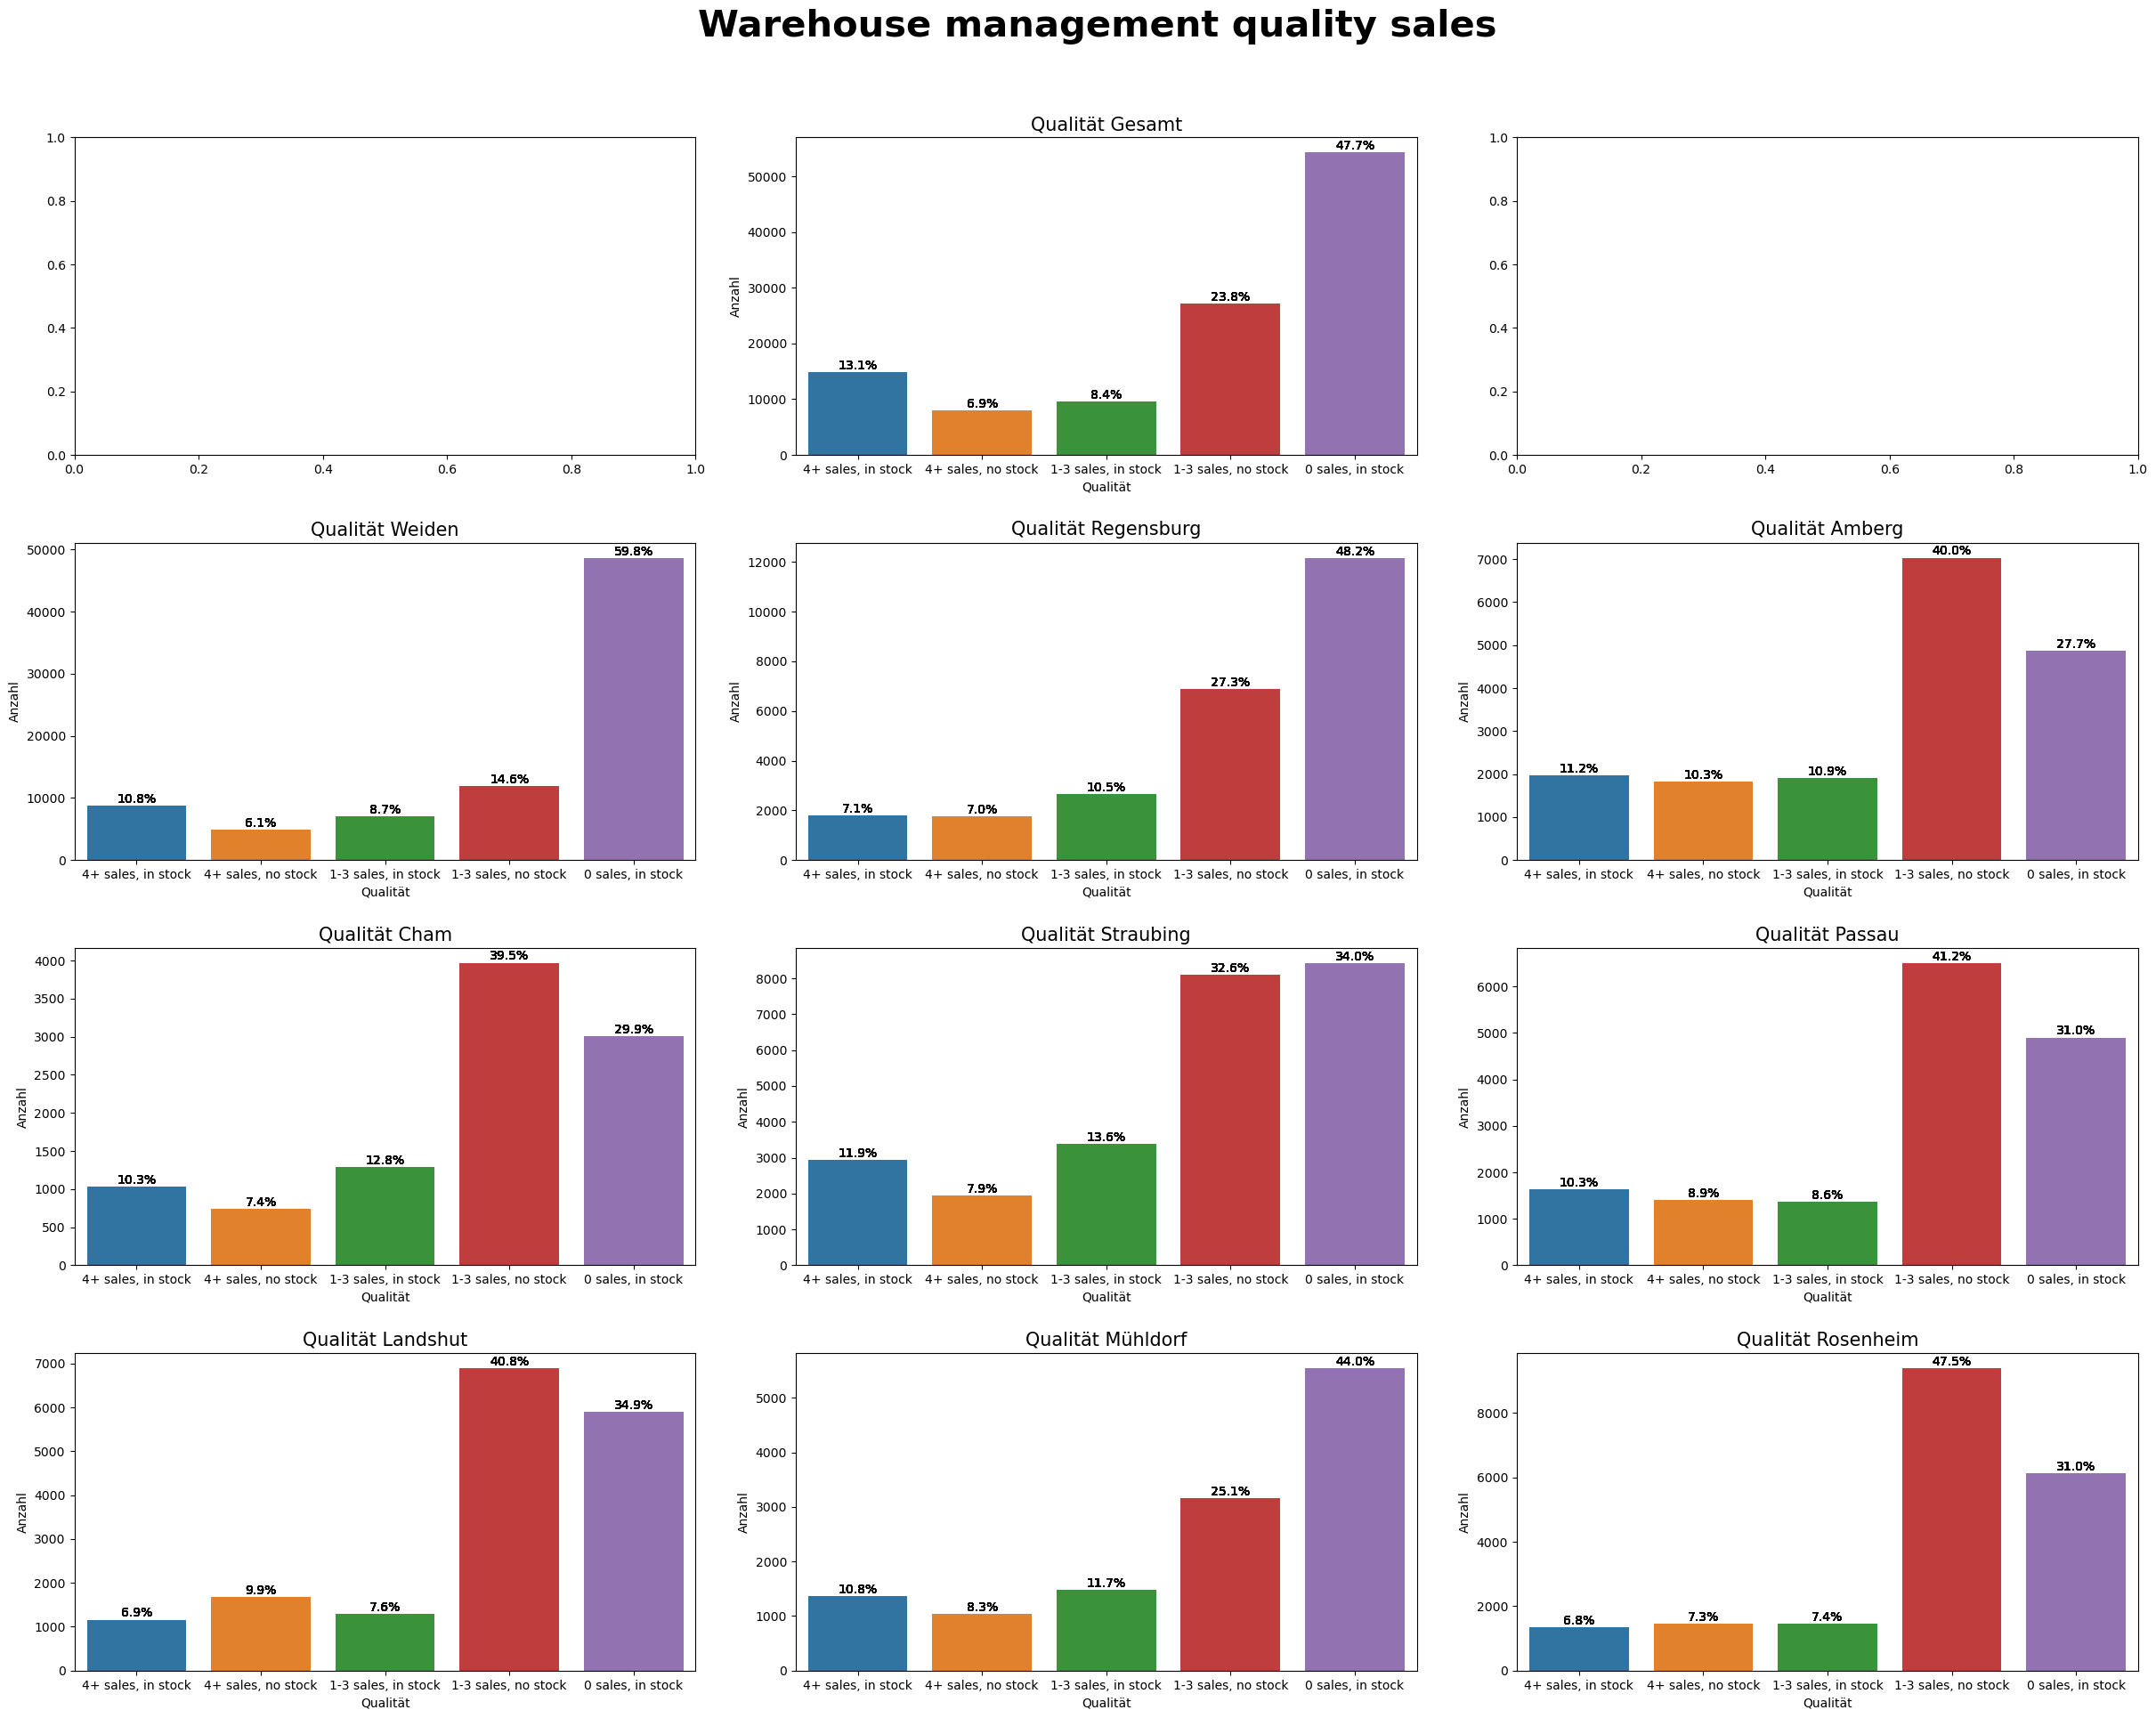

In [147]:
locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

PE_categories = ['4+ sales, in stock', '4+ sales, no stock', '1-3 sales, in stock', '1-3 sales, no stock', '0 sales, in stock']
display_order_quality = PE_categories

for x in locations.keys():
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

fig, axes = plt.subplots(4, 3, figsize=(25,20))
fig.suptitle('Warehouse management quality sales', fontweight='bold', fontsize=30)
fig.tight_layout(pad=5.0)

for i in range (13):
    y = 0
    z = 1

    for key, value in locations.items():

            
        location = df_master.query(key + '_quality != "0"').reset_index()

        sub = sns.countplot(ax=axes[y, z], x=key + '_quality', data=location, order=display_order_quality)
        axes[y, z].set_title("Qualität " + value, fontsize=15.0)
        axes[y, z].set_xlabel('Qualität', fontsize=10.0)
        axes[y, z].set_ylabel('Anzahl', fontsize=10.0)
        # Erhalten Sie die Gesamtzahl der Qualitätsspalte
        total = location[key + '_quality'].count()

        freq_series = location[key + '_quality'].value_counts()
        freq_series = freq_series.reindex(display_order_quality)

        rects = sub.patches
        labels = [f'{(x/total)*100:.1f}%' for x in freq_series]
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            axes[y, z].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                    ha='center', va='bottom')
            
        z += 1  
        if y == 0 and z == 2:
            y = 1
            z = 0
            
        elif z >= 3:
            y += 1
            z = 0


## Erstellung Algorithmus/Methode zur Optimierung der Umlagerungsaufträge

Wenn ein Artikel auf Lager ist aber weniger als 4 mal verkauft wurde soll dieser in ein lager geliefert werden der den Artikel nicht auf Lager hat aber ihn mehr als 3 mal verkauft hat.


when '0 sales, on stock' or '1-3 sales on stock' then stock divided by the number of warehouses with "4+ sales, no stock" and move them there.



In [148]:
df_master_quality = df_master.query('gesamt_quality != "0"')

In [149]:
""" locations = {'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
  if (location[key + '_quality'] == "1-3 sales, in stock").any() or (location[key + '_quality'] == "0 sales, in stock").any():
    for k, v in locations.items():
      move_to = []
      if (location[k + '_quality'] == "4+ sales, in stock").any():
        move_to.append(v)
        send_to = ', '.join(move_to)
        location['moving_from_' + k] = 'Send items to ' + send_to
  
location.query('ros_quality == "4+ sales, in stock"')
 """


' locations = {\'wen\': \'Weiden\', \n             \'rgb\': \'Regensburg\', \n             \'amb\': \'Amberg\', \n             \'cha\': \'Cham\', \n             \'str\': \'Straubing\', \n             \'pas\': \'Passau\', \n             \'lan\': \'Landshut\', \n             \'müh\': \'Mühldorf\', \n             \'ros\': \'Rosenheim\'}\n\nfor key, value in locations.items():\n  if (location[key + \'_quality\'] == "1-3 sales, in stock").any() or (location[key + \'_quality\'] == "0 sales, in stock").any():\n    for k, v in locations.items():\n      move_to = []\n      if (location[k + \'_quality\'] == "4+ sales, in stock").any():\n        move_to.append(v)\n        send_to = \', \'.join(move_to)\n        location[\'moving_from_\' + k] = \'Send items to \' + send_to\n  \nlocation.query(\'ros_quality == "4+ sales, in stock"\')\n '

In [150]:
""" locations = {'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
    df_master_quality['take_from_' + key] = df_master_quality.apply(lambda row: ', '.join([k for k, v in locations.items() if row[k + '_quality'] == '4+ sales, no stock']) if row[key + '_quality'] in ['1-3 sales, in stock', '0 sales, in stock'] else '-', axis=1)
df_master_quality """

" locations = {'wen': 'Weiden', \n             'rgb': 'Regensburg', \n             'amb': 'Amberg', \n             'cha': 'Cham', \n             'str': 'Straubing', \n             'pas': 'Passau', \n             'lan': 'Landshut', \n             'müh': 'Mühldorf', \n             'ros': 'Rosenheim'}\n\nfor key, value in locations.items():\n    df_master_quality['take_from_' + key] = df_master_quality.apply(lambda row: ', '.join([k for k, v in locations.items() if row[k + '_quality'] == '4+ sales, no stock']) if row[key + '_quality'] in ['1-3 sales, in stock', '0 sales, in stock'] else '-', axis=1)\ndf_master_quality "

In [151]:
""" #remove columns without entry
df_master_quality_final = df_master_quality[~(df_master_quality.filter(like='take_from_').isin(['-', ''])).all(axis=1)]
df_master_quality_final.sort_values(by='basispr_summe', ascending=False, inplace=True)
df_master_quality_final.reset_index() """

" #remove columns without entry\ndf_master_quality_final = df_master_quality[~(df_master_quality.filter(like='take_from_').isin(['-', ''])).all(axis=1)]\ndf_master_quality_final.sort_values(by='basispr_summe', ascending=False, inplace=True)\ndf_master_quality_final.reset_index() "

## Distribution

First look into take_from_... and figure out which cells have an value in it <br></br>
Get the name of the take_from_... and look up how much stock it has on ..._lager <br></br>
Put the names of the location that need an item into a list <br></br>
Look up how many sales they made on their own. <br></br>
Assign the value they should receive, based on a distribution key, to it <br></br>


In [152]:
locations = {'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

PE_categories = ['4+ sales, in stock', '4+ sales, no stock', '1-3 sales, in stock', '1-3 sales, no stock', '0 sales, in stock']
display_order_quality = PE_categories

for x in locations.keys():
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

for key, value in locations.items():
    df_master_quality['take_from_' + key] = df_master_quality.apply(lambda row: ', '.join([k for k, v in locations.items() if row[k + '_quality'] == '4+ sales, no stock']) if row[key + '_quality'] in ['1-3 sales, in stock', '0 sales, in stock'] else '-', axis=1)

df_master_quality_final = df_master_quality[~(df_master_quality.filter(like='take_from_').isin(['-', ''])).all(axis=1)]

## Equal distribution by most sales

In [153]:
df_master_quality_distribution = df_master_quality_final

def count_list_elements(x):
    if x == ['-']:
        return 0
    else:
        return len(x)
    

def assigning(row):
    a = row['list']
    b = row['dividing']
    c = row['remainder']
    d = row['best_sales']
    result = [f"{x} ({b + c:.0f})" if x == d else f"{x} ({b:.0f})" for x in a]
    return result

def best_sale(row):
    a = row['list']
    if a == ['-']:
        return '-'
    else:
        best_sales = sorted([row[k + '_vk'] for k in row['list'] if k != '-' and k + '_vk' in row.index and row[k + '_vk'] is not None], key=lambda y: float(y) if isinstance(y, str) else y, reverse=True)[0]
        for i in row['list']:
            if row[i + '_vk'] == best_sales:
                return i
            
def calculate_stock(row):
    total_stock = 0
    pattern = r'\(\d+\)'
    for key in locations.keys():
        if isinstance(row['take_from_' + key], str) and row['take_from_' + key] != '-':
            matches = re.findall(pattern, row['take_from_' + key])
            for match in matches:
                stock = int(match[1:-1])
                total_stock += stock
    total_stock *= row['basispreis']
    return total_stock


for key, value in locations.items():
    df_master_quality_distribution['list'] = df_master_quality_distribution['take_from_' + key].apply(lambda x: [i for i in x.split(', ')])
    df_master_quality_distribution['numbers'] = df_master_quality_distribution['list'].apply(count_list_elements)
    df_master_quality_distribution['dividing'] = (df_master_quality_distribution[key +'_lager']/df_master_quality_distribution['numbers']).apply(np.floor)
    df_master_quality_distribution['remainder'] = (df_master_quality_distribution[key + '_lager']%df_master_quality_distribution['numbers'])
    df_master_quality_distribution['best_sales'] = df_master_quality_distribution.apply(best_sale, axis=1)
    df_master_quality_distribution['locations'] = df_master_quality_distribution.apply(assigning, axis=1)
    df_master_quality_distribution['locations'] = [','.join(map(str, l)) for l in df_master_quality_distribution['locations']]
    df_master_quality_distribution['locations'] = df_master_quality_distribution['locations'].replace(["- (nan)", "- (inf)", "- (-inf)"], "-")
    df_master_quality_distribution['take_from_' + key] = df_master_quality_distribution['locations']
    df_master_quality_distribution['stock'] = df_master_quality_distribution.apply(calculate_stock, axis=1)
df_master_quality_distribution.query('remainder > 0')

lfnr lieferant        artnr                    beschreibung index  \
10159   135       SKF     VKBA3574         RADLAGERSATZ BMW, IVECO     0   
12945   440   COPARTS       CO1111  CAR1 SPECIAL F PLUS 0W30 5Ltr.     0   
12952   440   COPARTS       CO1054       CAR1 SAE 5W30 SUPER MBI -     0   
13908   440   COPARTS       CO3512                    AD BLUE 60 L     0   
13940   440   COPARTS       CO3221  REIFEN-MONTAGE-FIX, PUMPSPRAYF     0   
...     ...       ...          ...                             ...   ...   
328974    0     BOSCH   2467413025                 ÜBERSTRÖMVENTIL     0   
336714    0     BOSCH   5998343071             PVC-ELEKTR.-LEITUNG     0   
336726    0     BOSCH   5998343165  AUTOKABEL FLK 1,5 SCHWARZ/GRÜN     0   
341880   65   TRISCAN   8500298001   BOLZENSATS BOLTSãT 8500295029     0   
349754  110       SWG  88397000375    FLEXROHR EDELSTAHL 45X230 MM     0   

        basispreis  basispr_summe  gesamt_lager           ltz_vk_ges  \
10159        25.76         154.56          6.00  2023-05-24 00:00:00   
12945        19.80         396.00         20.00  2023-05-24 00:00:00   
12952        16.20          48.60          3.00  2023-05-15 00:00:00   
13908        43.80         700.80         16.00  2023-05-31 00:00:00   
13940         3.50          87.50         25.00  2023-05-22 00:00:00   
...            ...            ...           ...                  ...   
328974       32.00          96.00          3.00  2023-05-16 00:00:00   
336714        0.30          45.90        153.00  2023-05-26 00:00:00   
336726        0.31          19.22         62.00  2022-08-30 00:00:00   
341880        7.83          15.66          2.00  2023-05-11 00:00:00   
349754        8.05          16.10          2.00  2023-06-02 00:00:00   

        wen_lager           ltz_vk_wen  rgb_lager           ltz_vk_rgb  \
10159        0.00  2023-03-15 00:00:00       0.00  2023-03-31 00:00:00   
12945        8.00  2023-05-24 00:00:00       0.00  2022-09-28 00:00:00   
12952        4.00  2023-03-31 00:00:00       0.00  2021-06-16 00:00:00   
13908       13.00  2023-04-25 00:00:00       1.00  2023-03-22 00:00:00   
13940        7.00  2023-05-11 00:00:00       0.00  2023-04-19 00:00:00   
...           ...                  ...        ...                  ...   
328974       1.00  2023-03-29 00:00:00       1.00  2022-10-31 00:00:00   
336714      57.00  2023-05-26 00:00:00      40.00  2021-05-28 00:00:00   
336726      37.00  2019-04-29 00:00:00       0.00  2012-06-13 00:00:00   
341880       0.00  2023-04-26 00:00:00       0.00  2022-11-30 00:00:00   
349754       0.00  2023-04-12 00:00:00       0.00  2023-05-31 00:00:00   

        amb_lager           ltz_vk_amb  cha_lager           ltz_vk_cha  \
10159        1.00  2023-05-24 00:00:00       1.00  2023-05-12 00:00:00   
12945        3.00  2023-05-24 00:00:00       0.00  2023-03-07 00:00:00   
12952        0.00  2023-05-15 00:00:00       0.00  2023-03-10 00:00:00   
13908        0.00  2022-12-13 00:00:00       1.00  2023-04-19 00:00:00   
13940        1.00  2023-04-21 00:00:00       0.00  2023-04-26 00:00:00   
...           ...                  ...        ...                  ...   
328974       0.00  2000-09-01 00:00:00       0.00  2015-03-18 00:00:00   
336714       0.00  2022-09-26 00:00:00       0.00  2022-10-13 00:00:00   
336726       0.00  2017-06-29 00:00:00       0.00  2021-07-16 00:00:00   
341880       0.00  2023-05-11 00:00:00       0.00                    0   
349754       0.00  2018-10-29 00:00:00       1.00  2022-11-23 00:00:00   

        str_lager           ltz_vk_str  pas_lager  ...          pas_quality  \
10159        1.00  2023-04-19 00:00:00       0.00  ...   4+ sales, no stock   
12945        0.00  2023-04-26 00:00:00       8.00  ...   4+ sales, in stock   
12952        0.00  2023-03-20 00:00:00      -2.00  ...                    0   
13908        0.00  2023-01-17 00:00:00       0.00  ...   4+ sales, no stock   
13940        3.00  2023-05-10 00:00:00      13.00  ...  

In [154]:
def renaming(row, key):
    pattern = '|'.join(locations.keys())
    a = row['take_from_' + key]
    p = pattern
    res = re.sub(pattern, lambda match: locations[match.group(0)], a)
    return res

def formating(row, key):
    a = row['take_from_' + key]
    res_blank = a.replace(',', ',\n')
    #res_double = a.replace(') (', ',)""')
    return res_blank

def keep_cols(DataFrame, keep_these):
    """Keep only the columns [keep_these] in a DataFrame, delete
    all other columns. 
    """
    drop_these = list(set(list(DataFrame)) - set(keep_these))
    return DataFrame.drop(drop_these, axis = 1)

take_from = ['lieferant', 'artnr', 'beschreibung']
for key in locations.keys():
    df_master_quality_distribution['take_from_' + key] = df_master_quality_distribution.apply(renaming, axis=1, key=key)
    df_master_quality_distribution['take_from_' + key] = df_master_quality_distribution.apply(formating, axis=1, key=key)
    a = f'take_from_{key}'
    take_from.append(a)

df_master_quality_distribution.sort_values(by='stock', ascending=False, inplace=True)
df_master_quality_distribution.reset_index(inplace=True, drop=True)
df_master_quality_output = df_master_quality_distribution.pipe(keep_cols, take_from)

In [155]:
df_master_quality_output.style

In [156]:
#df_master_quality_distribution.drop(['gesamt_quality', 'gesamt_vk', 'artnr', 'gesamt_lager', 'basispreis', 'basispr_summe', 'beschreibung', 'level_0', 'lieferant', 'lfnr', 'index', 'ltz_vk_ges', 'ltz_vk_wen', 'ltz_vk_rgb', 'ltz_vk_amb', 'ltz_vk_cha', 'ltz_vk_str', 'ltz_vk_pas', 'ltz_vk_lan', 'ltz_vk_müh', 'ltz_vk_ros'], axis=1)

In [157]:
""" df_master_quality_distribution = df_master_quality_final

def count_list_elements(x):
    if x == ['-']:
        return 0
    else:
        return len(x)
    

def assigning(row):
    a = row['list']
    b = row['dividing']
    c = row['remainder']
    d = row['best_sales']
    result = [f"{x} ({b + c:.0f})" if x == d else f"{x} ({b:.0f})" for x in a]
    return result

def best_sale(row):
    a = row['list']
    if a == ['-']:
        return '-'
    else:
        best_sales = sorted([row[k + '_vk'] for k in row['list'] if k != '-' and k + '_vk' in row.index and row[k + '_vk'] is not None], key=lambda y: float(y) if isinstance(y, str) else y, reverse=True)[0]
        for i in row['list']:
            if row[i + '_vk'] == best_sales:
                return i

def relevant_sale(row):
    sales = []
    for k in row['list']:
        if k != '-':
            vk_column = k + '_vk'
            if vk_column in row.index:
                sales.append(row[vk_column])
    return sum(sales)

def calculate_percentage(row):
    
    sales = 0
    total_sales = 0
    for k in row['list']:
        if k != '-':
            print(k)
             vk_column = k + '_vk'
            if vk_column in row.index and row.get(vk_column) != '-' and not pd.isnull(row.get(vk_column)):
                sales += float(row.get(vk_column))
            if row.get('sales') != '-' and not pd.isnull(row.get('sales')):
                total_sales += float(row.get('sales'))
    if total_sales > 0:
        return (sales / total_sales) * 100
    return '-'


for key, value in locations.items():
    df_master_quality_distribution['list'] = df_master_quality_distribution['take_from_' + key].apply(lambda x: [i for i in x.split(', ')])
    df_master_quality_distribution['numbers'] = df_master_quality_distribution['list'].apply(count_list_elements)
    df_master_quality_distribution['sales'] = df_master_quality_distribution.apply(relevant_sale, axis=1)
    df_master_quality_distribution[key + '_sales in %'] = df_master_quality_distribution.apply(calculate_percentage, axis=1)
    df_master_quality_distribution['dividing'] = (df_master_quality_distribution[key +'_lager']/df_master_quality_distribution['numbers']).apply(np.floor)
    df_master_quality_distribution['remainder'] = (df_master_quality_distribution[key + '_lager']%df_master_quality_distribution['numbers'])
    df_master_quality_distribution['best_sales'] = df_master_quality_distribution.apply(best_sale, axis=1)
    df_master_quality_distribution['locations'] = df_master_quality_distribution.apply(assigning, axis=1)
    df_master_quality_distribution['locations'] = [','.join(map(str, l)) for l in df_master_quality_distribution['locations']]
    df_master_quality_distribution['locations'] = df_master_quality_distribution['locations'].replace(["- (nan)", "- (inf)", "- (-inf)"], "-")
    df_master_quality_distribution['take_from_' + key] = df_master_quality_distribution['locations'] """



' df_master_quality_distribution = df_master_quality_final\n\ndef count_list_elements(x):\n    if x == [\'-\']:\n        return 0\n    else:\n        return len(x)\n    \n\ndef assigning(row):\n    a = row[\'list\']\n    b = row[\'dividing\']\n    c = row[\'remainder\']\n    d = row[\'best_sales\']\n    result = [f"{x} ({b + c:.0f})" if x == d else f"{x} ({b:.0f})" for x in a]\n    return result\n\ndef best_sale(row):\n    a = row[\'list\']\n    if a == [\'-\']:\n        return \'-\'\n    else:\n        best_sales = sorted([row[k + \'_vk\'] for k in row[\'list\'] if k != \'-\' and k + \'_vk\' in row.index and row[k + \'_vk\'] is not None], key=lambda y: float(y) if isinstance(y, str) else y, reverse=True)[0]\n        for i in row[\'list\']:\n            if row[i + \'_vk\'] == best_sales:\n                return i\n\ndef relevant_sale(row):\n    sales = []\n    for k in row[\'list\']:\n        if k != \'-\':\n            vk_column = k + \'_vk\'\n            if vk_column in row.index:\n 

In [158]:
#df_master_quality_distribution.drop(['gesamt_quality', 'gesamt_vk', 'artnr', 'gesamt_lager', 'basispreis', 'basispr_summe', 'beschreibung', 'level_0', 'lieferant', 'lfnr', 'index', 'ltz_vk_ges', 'ltz_vk_wen', 'ltz_vk_rgb', 'ltz_vk_amb', 'ltz_vk_cha', 'ltz_vk_str', 'ltz_vk_pas', 'ltz_vk_lan', 'ltz_vk_müh', 'ltz_vk_ros'], axis=1)


In [159]:
""" #for key, value in location.items():
#pd.set_option('display.max_rows', None)
df_master_quality_final['list'] = df_master_quality_final['take_from_amb'].apply(lambda x: [i for i in x.split(', ')])
df_master_quality_final.query('list != "-"') """

' #for key, value in location.items():\n#pd.set_option(\'display.max_rows\', None)\ndf_master_quality_final[\'list\'] = df_master_quality_final[\'take_from_amb\'].apply(lambda x: [i for i in x.split(\', \')])\ndf_master_quality_final.query(\'list != "-"\') '

In [160]:
""" def count_list_elements(x):
    if x == ['-']:
        return 0
    else:
        return len(x)

df_master_quality_final['numbers'] = df_master_quality_final['list'].apply(count_list_elements)
df_master_quality_final.query('numbers == 3') """

" def count_list_elements(x):\n    if x == ['-']:\n        return 0\n    else:\n        return len(x)\n\ndf_master_quality_final['numbers'] = df_master_quality_final['list'].apply(count_list_elements)\ndf_master_quality_final.query('numbers == 3') "

In [161]:
""" df_master_quality_final['dividing'] = df_master_quality_final['amb_lager']/df_master_quality_final['numbers']
df_master_quality_final['dividing'] = df_master_quality_final['dividing'].apply(np.floor)
df_master_quality_final.query('numbers > 1 and take_from_amb != "-"') """

' df_master_quality_final[\'dividing\'] = df_master_quality_final[\'amb_lager\']/df_master_quality_final[\'numbers\']\ndf_master_quality_final[\'dividing\'] = df_master_quality_final[\'dividing\'].apply(np.floor)\ndf_master_quality_final.query(\'numbers > 1 and take_from_amb != "-"\') '

In [162]:
""" df_master_quality_final['remainder'] = df_master_quality_final['amb_lager']%df_master_quality_final['numbers']
df_master_quality_final.query('dividing > 1 and remainder > 0 and take_from_amb != "-"') """

' df_master_quality_final[\'remainder\'] = df_master_quality_final[\'amb_lager\']%df_master_quality_final[\'numbers\']\ndf_master_quality_final.query(\'dividing > 1 and remainder > 0 and take_from_amb != "-"\') '

In [163]:
""" def assigning(row):
    a = row['list']
    b = row['dividing']
    result = [f"{x} ({b})" for x in a]
    return result

df_master_quality_final['locations'] = df_master_quality_final.apply(assigning, axis=1)
df_master_quality_final['locations'] = [','.join(map(str, l)) for l in df_master_quality_final['locations']]
df_master_quality_final['locations'] = df_master_quality_final['locations'].replace(["- (nan)", "- (inf)"], "-")
df_master_quality_final['take_from_amb'] = df_master_quality_final['locations']
df_master_quality_final """

' def assigning(row):\n    a = row[\'list\']\n    b = row[\'dividing\']\n    result = [f"{x} ({b})" for x in a]\n    return result\n\ndf_master_quality_final[\'locations\'] = df_master_quality_final.apply(assigning, axis=1)\ndf_master_quality_final[\'locations\'] = [\',\'.join(map(str, l)) for l in df_master_quality_final[\'locations\']]\ndf_master_quality_final[\'locations\'] = df_master_quality_final[\'locations\'].replace(["- (nan)", "- (inf)"], "-")\ndf_master_quality_final[\'take_from_amb\'] = df_master_quality_final[\'locations\']\ndf_master_quality_final '

In [164]:
""" for key, value in location.items():
    if df_master_quality_final['send_to_' + key] != '-':
        stock = df_master_quality_final[key + '_lager']
        list = df_master_quality_final['send_to_' + key].apply(lambda x: [int(i for i in x.split(', '))])
        splitting = stock / len(li)
        splitting = math.ceil(splitting)
        for l in list:
            number = l + '(splitting)'
            df_master_quality['take_from_' + key] = df_master_quality.apply(lambda row: ', '.join(number)) """

" for key, value in location.items():\n    if df_master_quality_final['send_to_' + key] != '-':\n        stock = df_master_quality_final[key + '_lager']\n        list = df_master_quality_final['send_to_' + key].apply(lambda x: [int(i for i in x.split(', '))])\n        splitting = stock / len(li)\n        splitting = math.ceil(splitting)\n        for l in list:\n            number = l + '(splitting)'\n            df_master_quality['take_from_' + key] = df_master_quality.apply(lambda row: ', '.join(number)) "

In [165]:
""" df_master_quality_final['gesamt_lager'].value_counts().sort_values(ascending=False) """

" df_master_quality_final['gesamt_lager'].value_counts().sort_values(ascending=False) "

In [166]:
""" #Hide columns not needed
final_output = df_master_quality_filtered.style.hide_columns(['index', 'ltz_vk_ges', 'ltz_vk_wen', 'ltz_vk_rgb', 'ltz_vk_amb', 'ltz_vk_cha', 'ltz_vk_str', 'ltz_vk_pas', 'ltz_vk_lan', 'ltz_vk_müh', 'ltz_vk_ros'])
final_output """

" #Hide columns not needed\nfinal_output = df_master_quality_filtered.style.hide_columns(['index', 'ltz_vk_ges', 'ltz_vk_wen', 'ltz_vk_rgb', 'ltz_vk_amb', 'ltz_vk_cha', 'ltz_vk_str', 'ltz_vk_pas', 'ltz_vk_lan', 'ltz_vk_müh', 'ltz_vk_ros'])\nfinal_output "